# fig — convergence

**Motivation**: host = ```mach```, device = ```cuda:2``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 2
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:2  ———  host: mach

In [3]:
def _eval(seq_total: int = 1000, n_data_batches=None, color='C0'):
    if tr.model.cfg.seq_len == 1:
        seq_total = 1
    results = tr.analysis('vld', seq_total=seq_total, n_data_batches=n_data_batches, verbose=True)
    
    fig, axes = plot_convergence(results, color=color, display=False)
    fig.suptitle(name, fontsize=16, fontfamily='monospace', color='darkgreen', y=1.1)
    display(fig)

## VAE: amort and iterative

In [4]:
kws = dict(
    device=device,
    shuffle=False,
    strict=True,
)

### BRAIN-SAE

In [5]:
models_to_load = {
    # conv
    '<jacob|conv>_(2,0.75)': dict(
        model_name='poisson_MNIST_t-2_z-[64]_k-32_<jacob|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(0.75:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_25,23:18)',
    ),
    '<jacob|conv>_(4,1.5)': dict(
        model_name='poisson_MNIST_t-4_z-[64]_k-32_<jacob|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(1.5:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_25,13:26)',
    ),
    '<conv|conv>_(4,1.5)': dict(
        model_name='poisson_MNIST_t-4_z-[64]_k-32_<conv|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(1.5:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_24,21:23)',
    ),
    '<jacob|conv>_(16,8.0)': dict(
        model_name='poisson_MNIST_t-16_z-[64]_k-32_<jacob|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(8:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_24,16:22)',
        path='Dropbox/chkpts/model_hub/solo',
    ),
    '<conv|conv>_(16,8.0)': dict(
        model_name='poisson_MNIST_t-16_z-[64]_k-32_<conv|conv>',
        fit_name='b200-ep400-lr(0.002)_beta(8:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_24,16:22)',
        path='Dropbox/chkpts/model_hub/solo',
    ),
    # mlp
    '<jacob|mlp>_(4,1.5)': dict(
        model_name='poisson_MNIST_t-4_z-[128]_<jacob|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(1.5:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_25,19:19)',
    ),
    '<mlp|mlp>_(4,1.5)': dict(
        model_name='poisson_MNIST_t-4_z-[128]_<mlp|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(1.5:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_24,13:38)',
    ),
    '<jacob|mlp>_(16,8.0)': dict(
        model_name='poisson_MNIST_t-16_z-[128]_<jacob|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(8:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_25,15:37)',
    ),
    '<mlp|mlp>_(16,8.0)': dict(
        model_name='poisson_MNIST_t-16_z-[128]_<mlp|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(8:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_24,17:58)',
    ),
    '<jacob|mlp>_(64,24.0)': dict(
        model_name='poisson_MNIST_t-64_z-[128]_<jacob|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(24:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_24,13:41)',
    ),
    '<mlp|mlp>_(64,24.0)': dict(
        model_name='poisson_MNIST_t-64_z-[128]_<mlp|mlp>',
        fit_name='b200-ep400-lr(0.002)_beta(24:0x0.1)_temp(0.05:lin-0.5)_gr(50)_(2024_09_24,20:01)',
    ),
}
models_to_load = {
    k: {**d, **kws} for
    k, d in models_to_load.items()
    if len(d['model_name']) > 0
}

____________________________________________________________________________________________________

<jacob|conv>_(2,0.75)   # params: 1.30 M

100%|███████████████████████████████████| 3/3 [01:13<00:00, 24.49s/it]


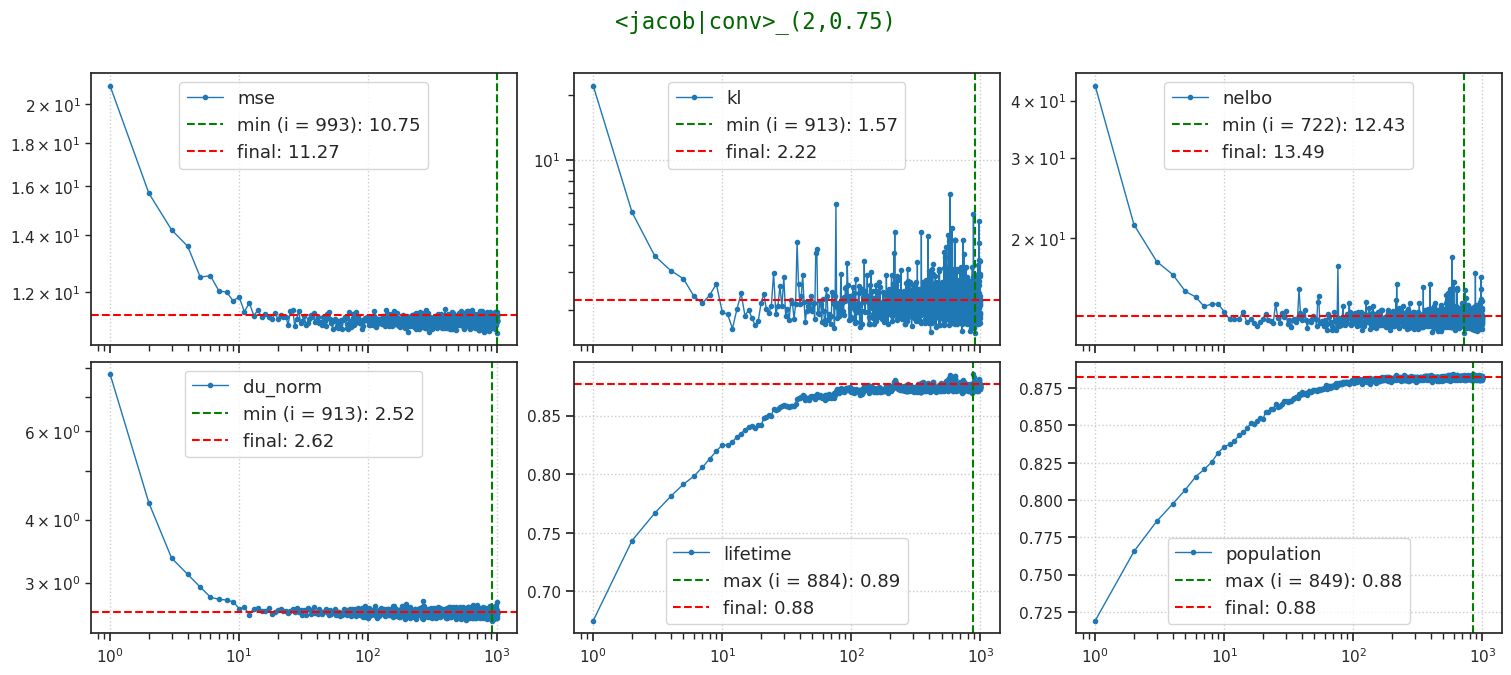

____________________________________________________________________________________________________

<jacob|conv>_(4,1.5)    # params: 1.30 M

100%|███████████████████████████████████| 3/3 [01:13<00:00, 24.49s/it]


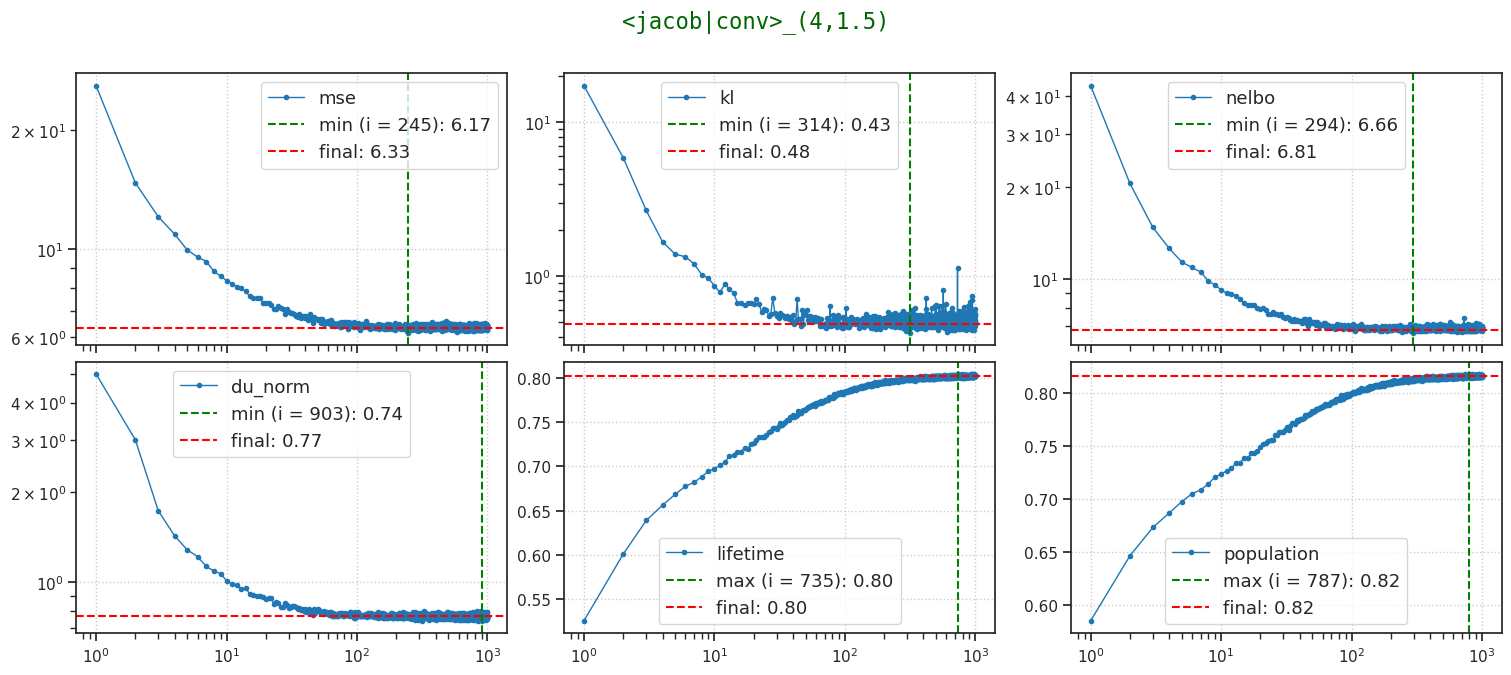

____________________________________________________________________________________________________

<conv|conv>_(4,1.5)     # params: 2.80 M

100%|███████████████████████████████████| 3/3 [00:26<00:00,  8.82s/it]


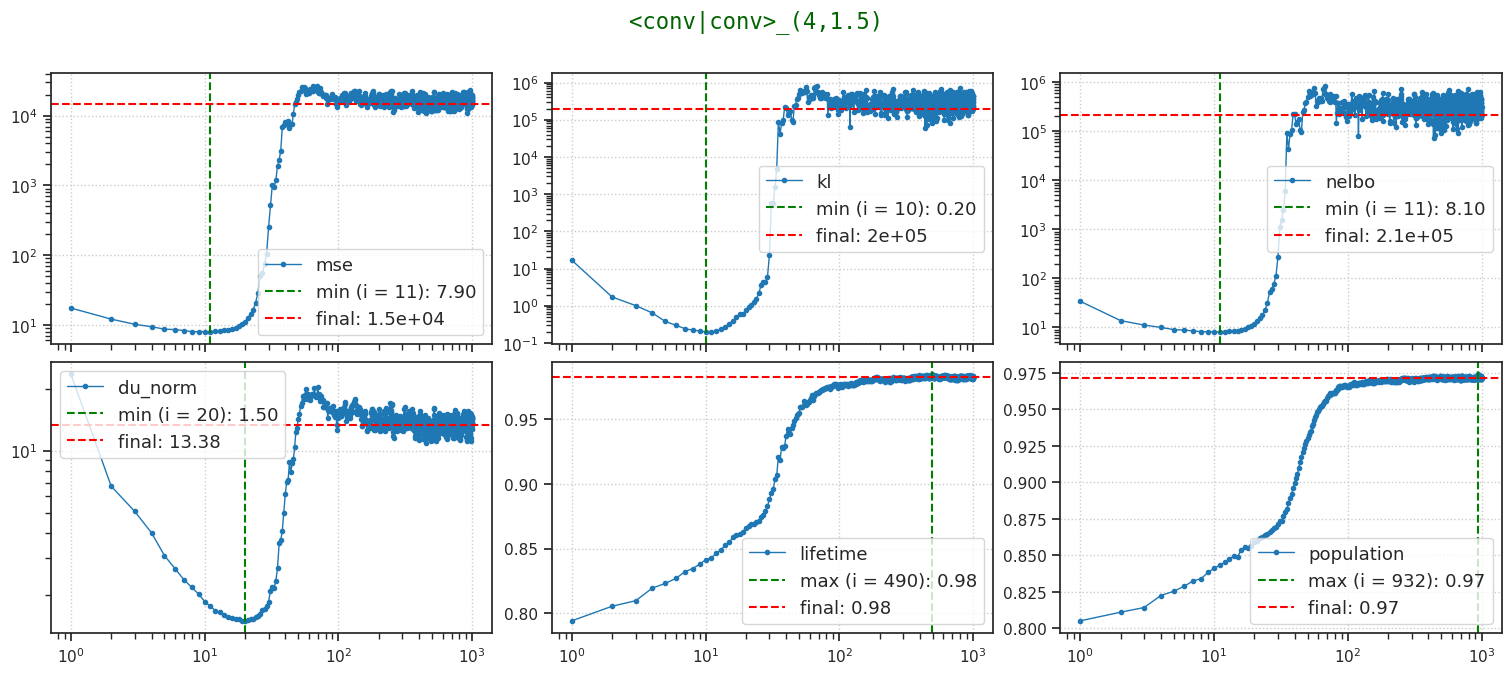

____________________________________________________________________________________________________

<jacob|conv>_(16,8.0)   # params: 1.30 M

100%|███████████████████████████████████| 3/3 [01:13<00:00, 24.42s/it]


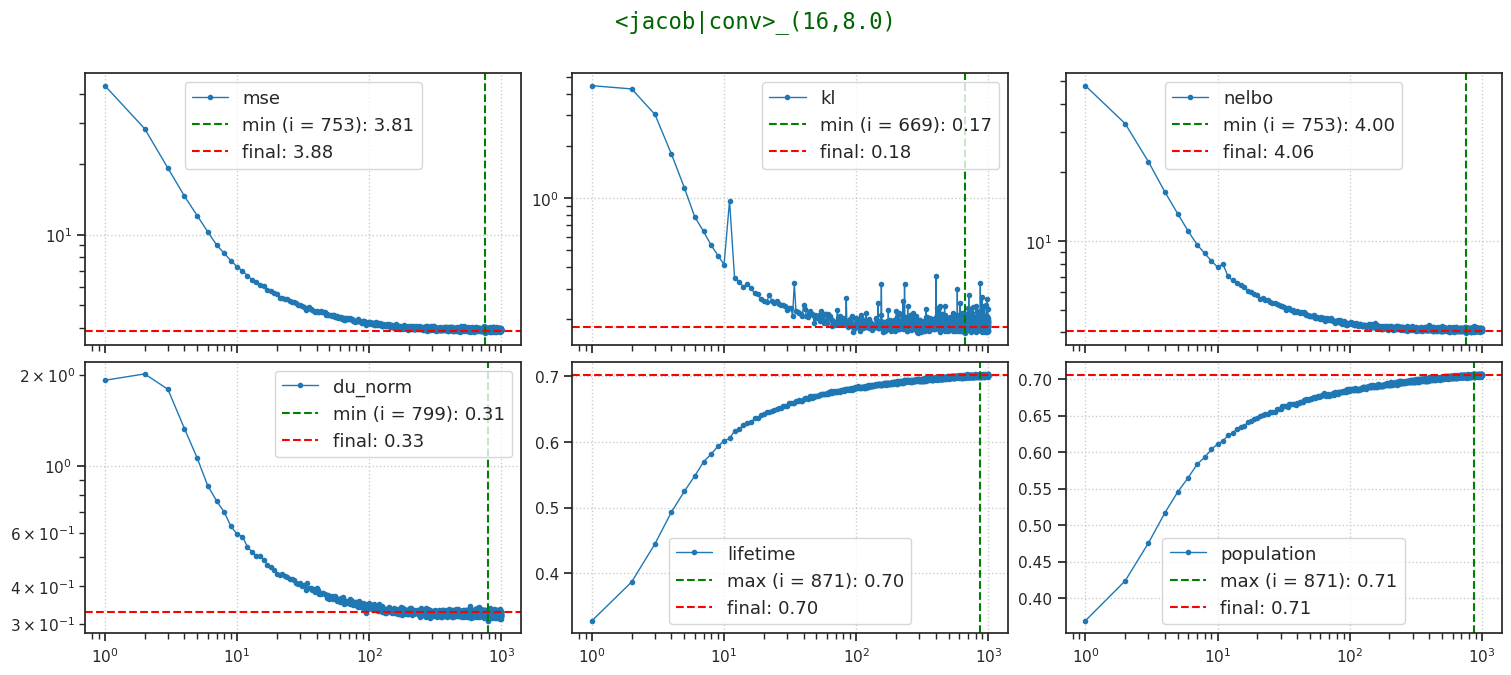

____________________________________________________________________________________________________

<conv|conv>_(16,8.0)    # params: 2.80 M

100%|███████████████████████████████████| 3/3 [00:25<00:00,  8.48s/it]


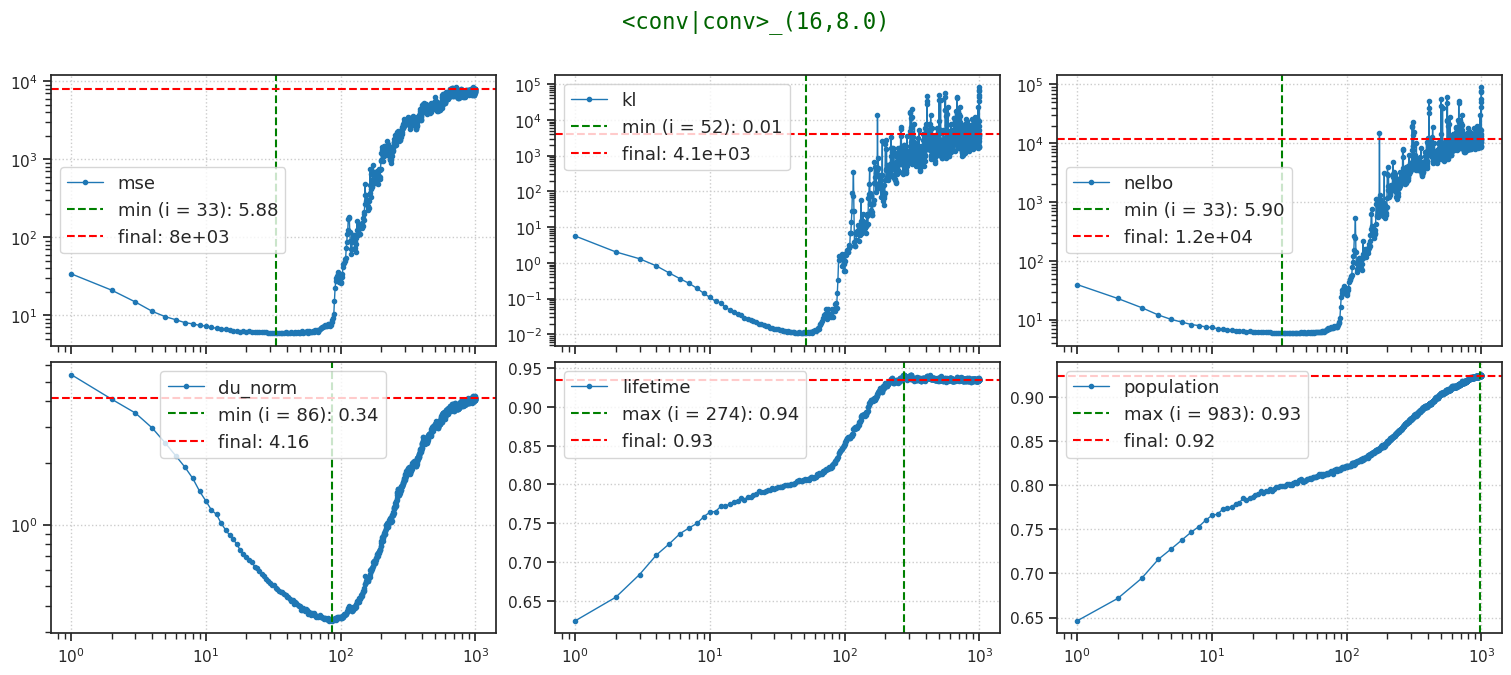

____________________________________________________________________________________________________

<jacob|mlp>_(4,1.5)     # params: 0.57 M

100%|███████████████████████████████████| 3/3 [00:09<00:00,  3.07s/it]


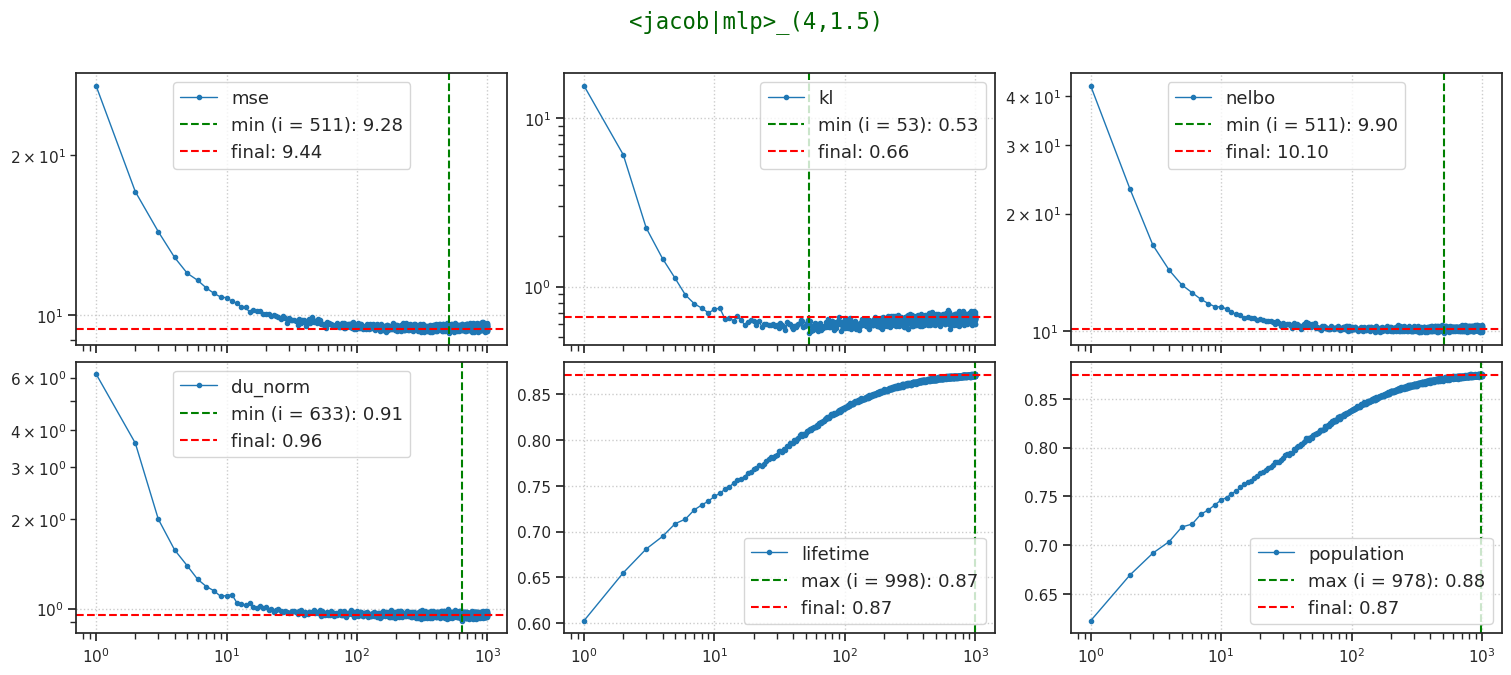

____________________________________________________________________________________________________

<mlp|mlp>_(4,1.5)       # params: 1.13 M

100%|███████████████████████████████████| 3/3 [00:13<00:00,  4.55s/it]


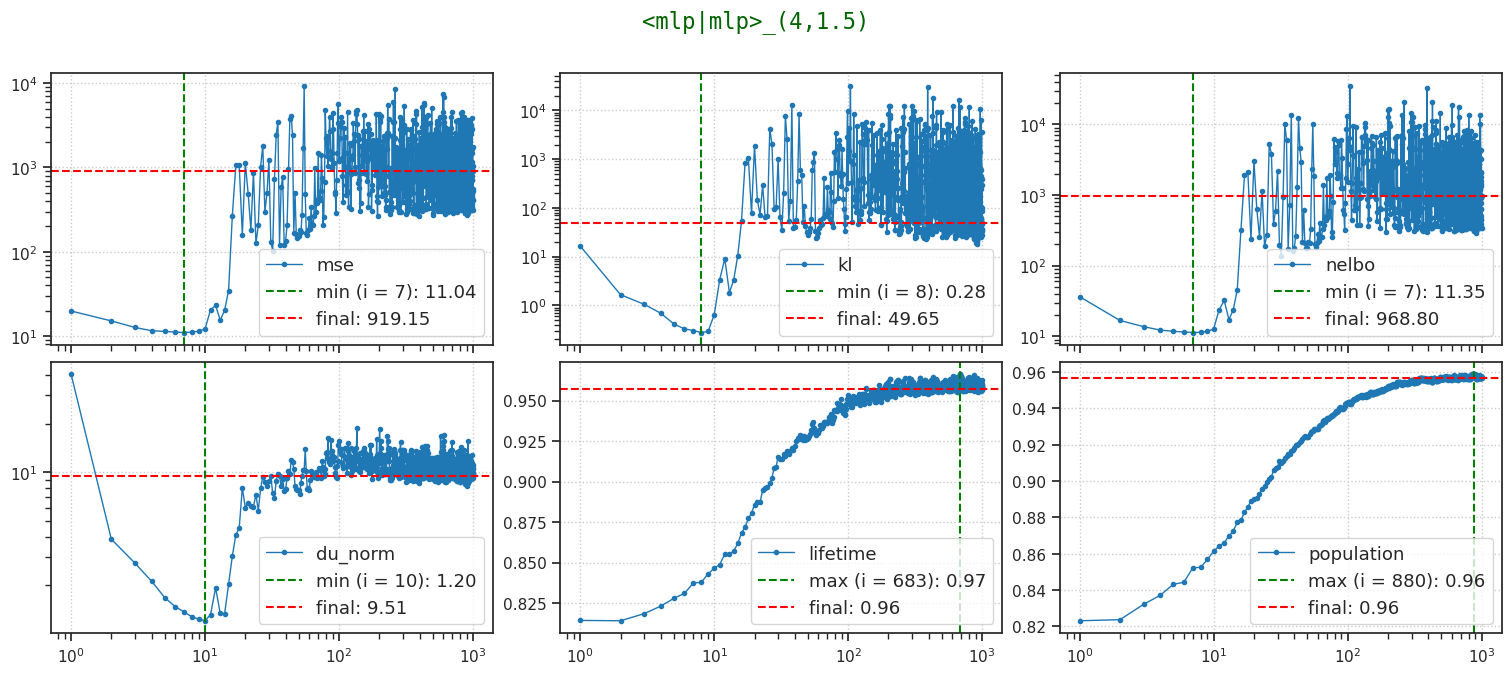

____________________________________________________________________________________________________

<jacob|mlp>_(16,8.0)    # params: 0.57 M

100%|███████████████████████████████████| 3/3 [00:08<00:00,  2.96s/it]


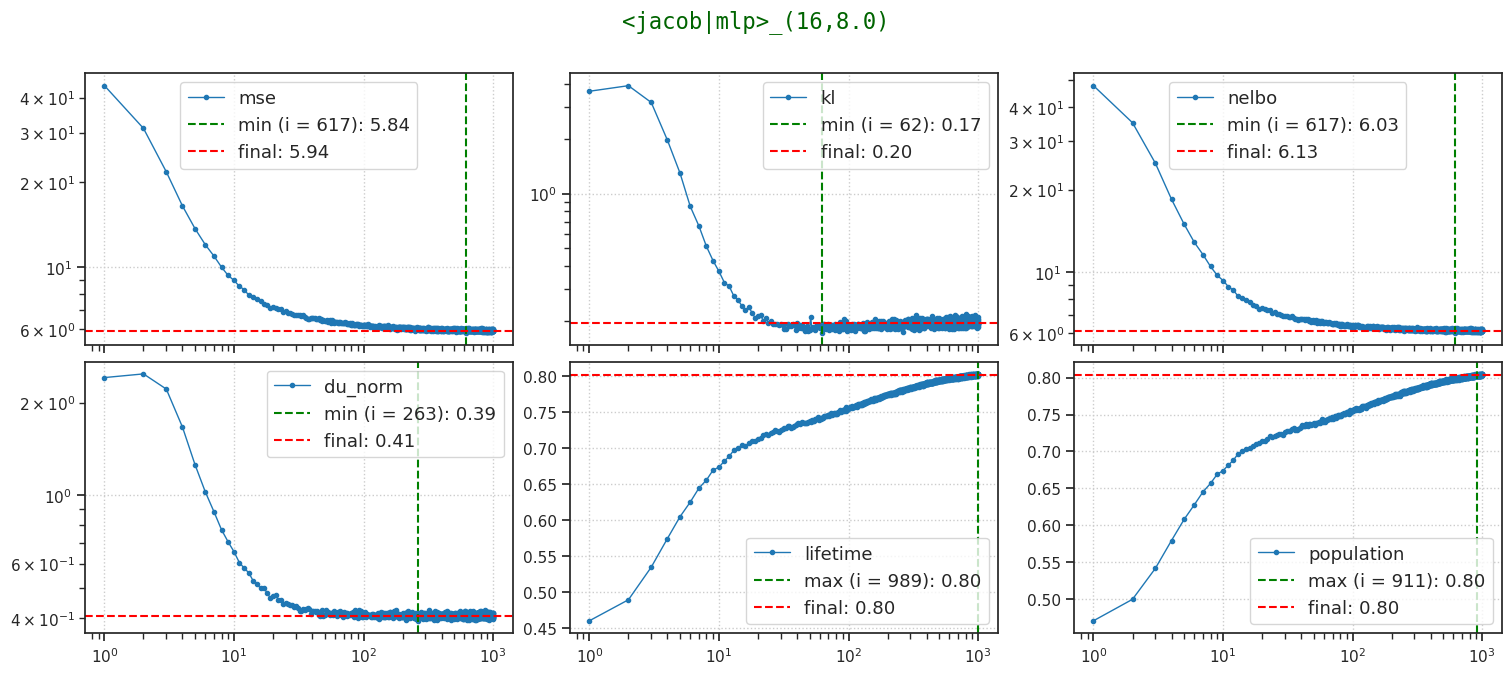

____________________________________________________________________________________________________

<mlp|mlp>_(16,8.0)      # params: 1.13 M

100%|███████████████████████████████████| 3/3 [00:28<00:00,  9.41s/it]


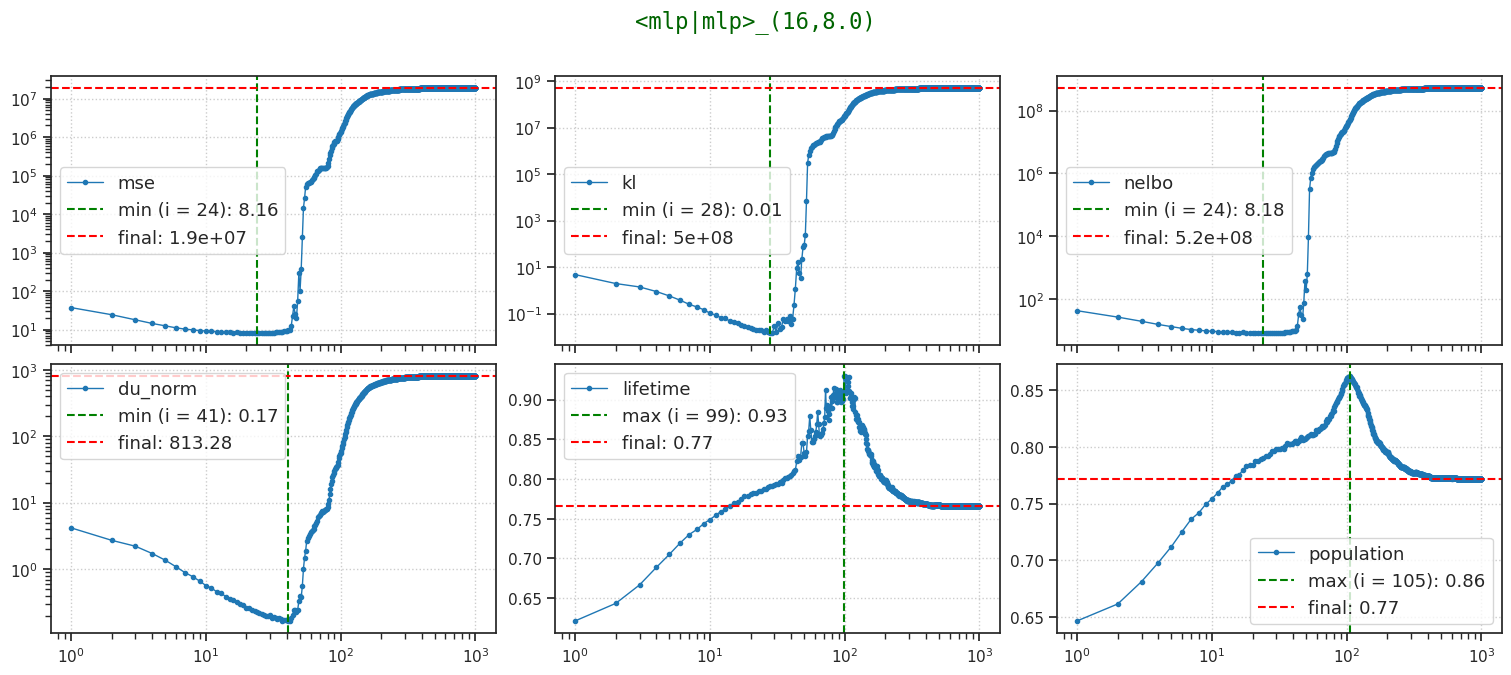

____________________________________________________________________________________________________

<jacob|mlp>_(64,24.0)   # params: 0.57 M

100%|███████████████████████████████████| 3/3 [00:09<00:00,  3.08s/it]


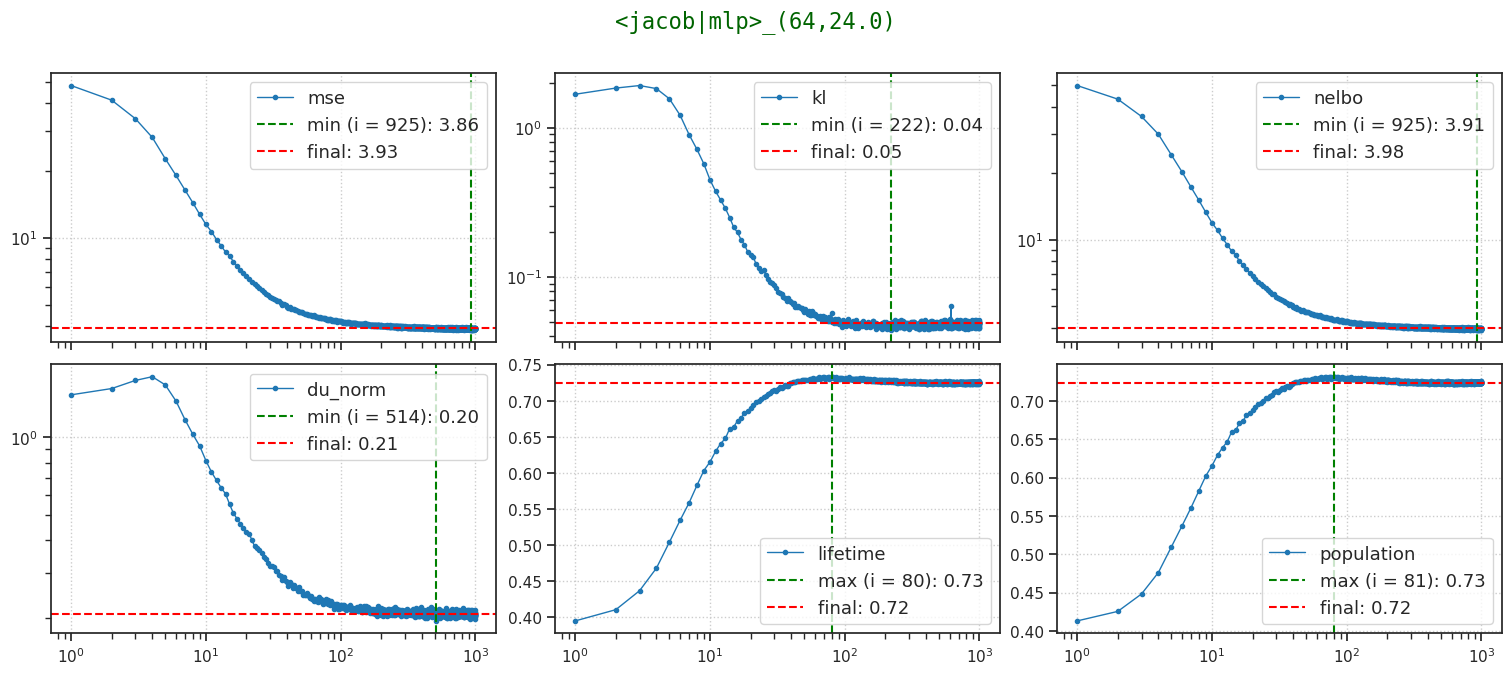

____________________________________________________________________________________________________

<mlp|mlp>_(64,24.0)     # params: 1.13 M

100%|███████████████████████████████████| 3/3 [00:24<00:00,  8.24s/it]


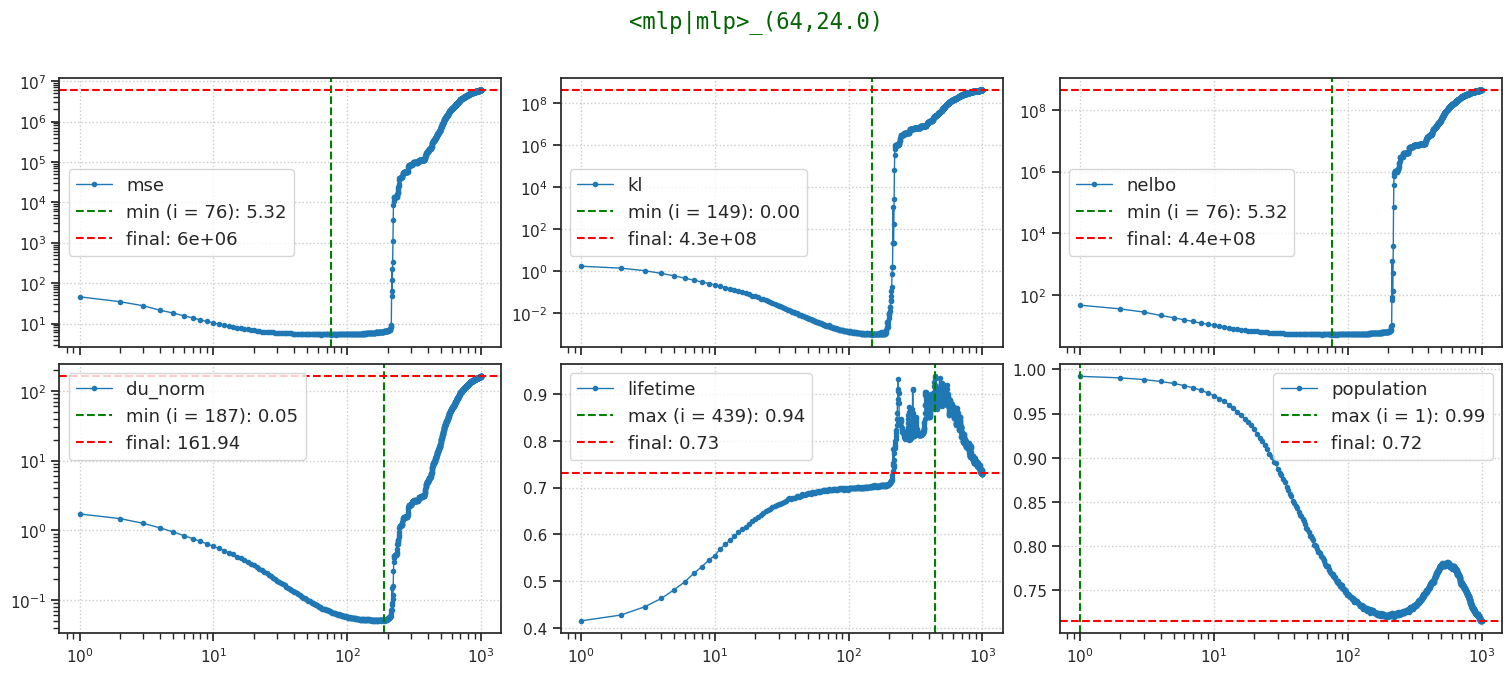

CPU times: user 12min 31s, sys: 20.8 s, total: 12min 52s
Wall time: 6min 36s


In [6]:
%%time


for name, kwargs in load_models.items():
    tr, meta = load_model(**kwargs)
    num_params = sum([
    	p.nelement() for p
        in tr.parameters()
    ])

    print('_' * 100)
    print(f"{name}\t# params: {num_params/1e6:0.2f} M")

    _eval(1000, 3, 'C0')

    print('\n\n')

In [7]:
df = []
for name, kwargs in tqdm(models_to_load.items()):
    tr, meta = load_model(**kwargs)

    seq_total = 1 if tr.model.cfg.seq_len == 1 else 1000
    results = tr.analysis('vld', seq_total=seq_total, n_data_batches=3, verbose=False)
    df.append({
        'name': [name] * seq_total,
        'n_iters_train': [tr.model.cfg.seq_len] * seq_total,
        'beta': [tr.cfg.kl_beta] * seq_total,
        'time': range(seq_total),
        'MSE': results['mse'],
        'NELBO': results['nelbo'],
        'Lifetime': results['lifetime'],
    })

df = pd.DataFrame(merge_dicts(df))

100%|███████████████████████████████████████████| 11/11 [06:14<00:00, 34.06s/it]


In [8]:
names = sorted(df['name'].unique())
print(names)

[
    '<conv|conv>_(16,8.0)',
    '<conv|conv>_(4,1.5)',
    '<jacob|conv>_(16,8.0)',
    '<jacob|conv>_(2,0.75)',
    '<jacob|conv>_(4,1.5)',
    '<jacob|mlp>_(16,8.0)',
    '<jacob|mlp>_(4,1.5)',
    '<jacob|mlp>_(64,24.0)',
    '<mlp|mlp>_(16,8.0)',
    '<mlp|mlp>_(4,1.5)',
    '<mlp|mlp>_(64,24.0)'
]

In [12]:
pal = sns.color_palette('tab10')

In [13]:
selected_conv = ['(4,1.5)', '(16,8.0)']
selected_mlp = ['(4,1.5)', '(16,8.0)', '(64,24.0)']

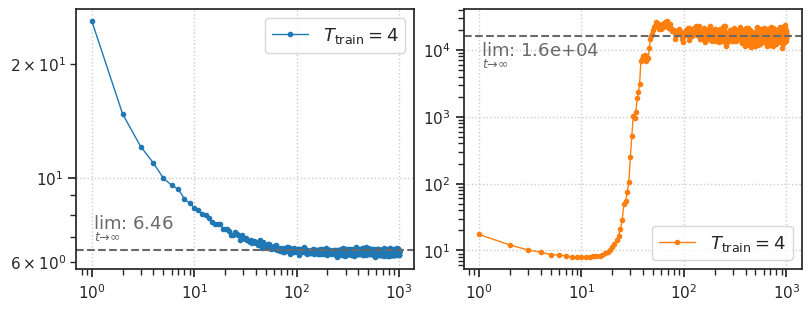

In [99]:
fig, axes = create_figure(1, 4, (15, 5))

for item in selected_conv:
    name = '<jacob|conv>_(4,1.5)'
    _df = df.loc[df['name'] == name]
    ax = axes[0]
    label = r"$T_\text{train} = $"
    label += str(_df['n_iters_train'].unique().item())
    ax = _subplot(ax, _df['MSE'].to_numpy(), label, color='C0')

    name = '<conv|conv>_(4,1.5)'
    _df = df.loc[df['name'] == name]
    ax = axes[1]
    label = r"$T_\text{train} = $"
    label += str(_df['n_iters_train'].unique().item())
    ax = _subplot(ax, _df['MSE'].to_numpy(), label, color='C1')

In [90]:
def _subplot(
        ax,
        data,
        label,
        intvl = None,
        xscale='log',
        yscale='log',
        **kwargs, ):
    defaults = {
        'figsize_x': 5.0,
        'figsize_y': 3.0,
        'legend_fontsize': 13,
        'color': 'C0',
        'marker': '.',
        'markersize': 6,
        'lw': 1,
    }
    kwargs = setup_kwargs(defaults, kwargs)
    _intvl = intvl or range(0, len(data))
    _intvl = range(
        _intvl.start,
        min(_intvl.stop, len(data)),
        _intvl.step,
    )
    y = data[_intvl]

    if _intvl.start == 0:
        xs = [i + 1 for i in _intvl]
        shifted = True
    else:
        xs = list(_intvl)
        shifted = False
    
    ax.plot(
        xs, y,
        label=label,
        color=kwargs['color'],
        marker=kwargs['marker'],
        markersize=kwargs['markersize'],
        lw=kwargs['lw'],
    )
    y_smooth = cumulative_mean(y)
    
    fmt = '0.2g' if y[-1] > 1000 else '0.2f'
    label = r"$\lim_{t \rightarrow \infty}: $"
    label += f" {y_smooth[-1]:{fmt}}"
    # label = f"final: {y_smooth[-1]:{fmt}}"
    ax.axhline(y_smooth[-1], color='dimgrey', ls='--')

    
    ax.annotate(
        text=label,
        xy=(0.05, y_smooth[-1]),
        xytext=(0, -14 if y[-1] > 1000 else 15),
        xycoords=('axes fraction', 'data'),
        textcoords='offset points',
        color='dimgrey',
        fontsize=13,
    )
    ax.set(xscale=xscale, yscale=yscale)
    ax.legend(fontsize=kwargs['legend_fontsize'])
    ax.grid()
    return ax